#### Importing required packages: 

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import export_text
from IPython.display import display
%matplotlib inline

#### Declaring columns, seed and pre-processed dataset:

In [109]:
SEED = 42
categorical_columns = ['hvacusage', 'lightingusage', 'dayofweek', 'holiday', 'month', 'day', 'hour']
numerical_columns = ['temperature', 'humidity', 'squarefootage', 'occupancy', 'renewableenergy', 'energyconsumption']

In [110]:
dataset = pd.read_csv('./datasets/energy_consumption_processed.csv')
print(dataset.shape)
dataset.head()

(1000, 13)


,temperature,humidity,squarefootage,occupancy,hvacusage,lightingusage,renewableenergy,dayofweek,holiday,energyconsumption,month,day,hour
0,25.139433,43.431581,1565.693999,5,on,off,2.774699,monday,no,75.364373,1,1,0
1,27.731651,54.225919,1411.064918,1,on,on,21.831384,saturday,no,83.401855,1,1,1
2,28.704277,58.907658,1755.715009,2,off,off,6.764672,sunday,no,78.270888,1,1,2
3,20.080469,50.371637,1452.316318,1,off,on,8.623447,wednesday,no,56.519850,1,1,3
4,23.097359,51.401421,1094.130359,9,on,off,3.071969,friday,no,70.811732,1,1,4


#### Splitting the dataset into train, test and validation and fitting DictVectorizer:

In [111]:
df_full_train, df_test = train_test_split(dataset, test_size=0.1, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.1111, random_state=SEED)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print("df_train: ", len(df_train))
print("df_val: ", len(df_val))
print("df_test: ", len(df_test))

y_train = df_train.energyconsumption.values
y_val = df_val.energyconsumption.values
y_test = df_test.energyconsumption.values

del df_train['energyconsumption']
del df_val['energyconsumption']
del df_test['energyconsumption']

df_train:  800
df_val:  100
df_test:  100


In [112]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

dv.fit(train_dicts)
X_train = dv.transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

print(dv.get_feature_names_out())

['day' 'dayofweek=friday' 'dayofweek=monday' 'dayofweek=saturday'
 'dayofweek=sunday' 'dayofweek=thursday' 'dayofweek=tuesday'
 'dayofweek=wednesday' 'holiday=no' 'holiday=yes' 'hour' 'humidity'
 'hvacusage=off' 'hvacusage=on' 'lightingusage=off' 'lightingusage=on'
 'month' 'occupancy' 'renewableenergy' 'squarefootage' 'temperature']


#### Feature Importance using RandomForestRegressor:

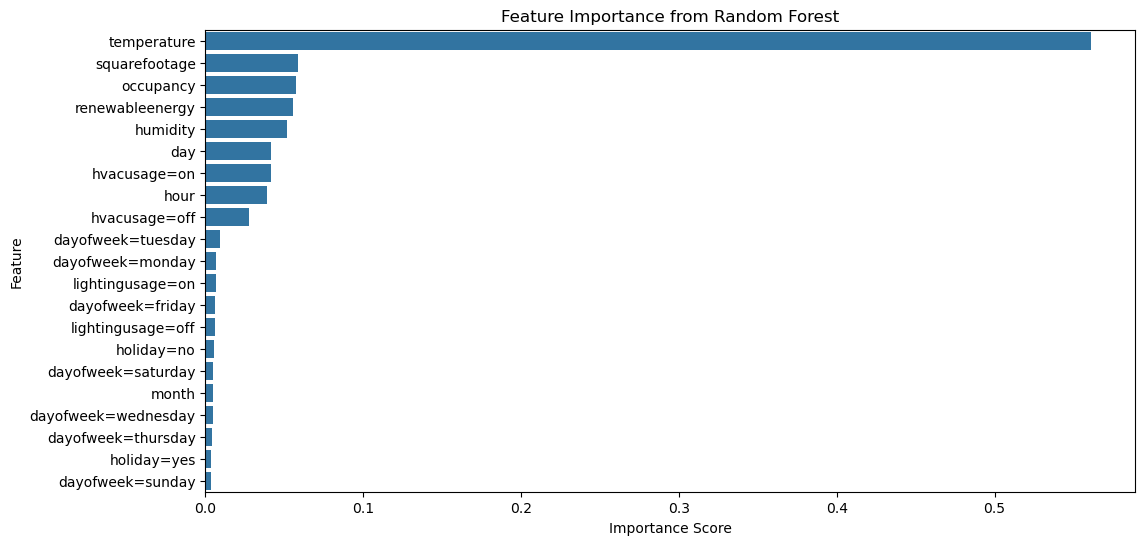

In [113]:
random_forest = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=SEED, n_jobs=-1)
random_forest.fit(X_train, y_train)

feature_importances = rf.feature_importances_
features = dv.get_feature_names_out()

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance Score': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance Score', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

#### Linear Regression:

In [143]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)

print("Linear Regression:")
print(f"Root Mean Squared Error: {rmse}")

Linear Regression:
Root Mean Squared Error: 4.87368052923831


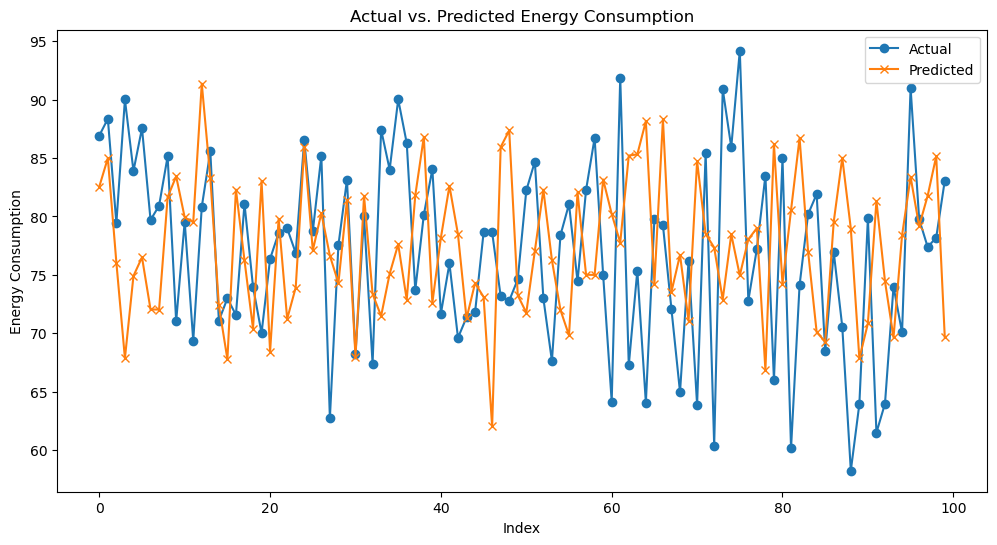

In [144]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

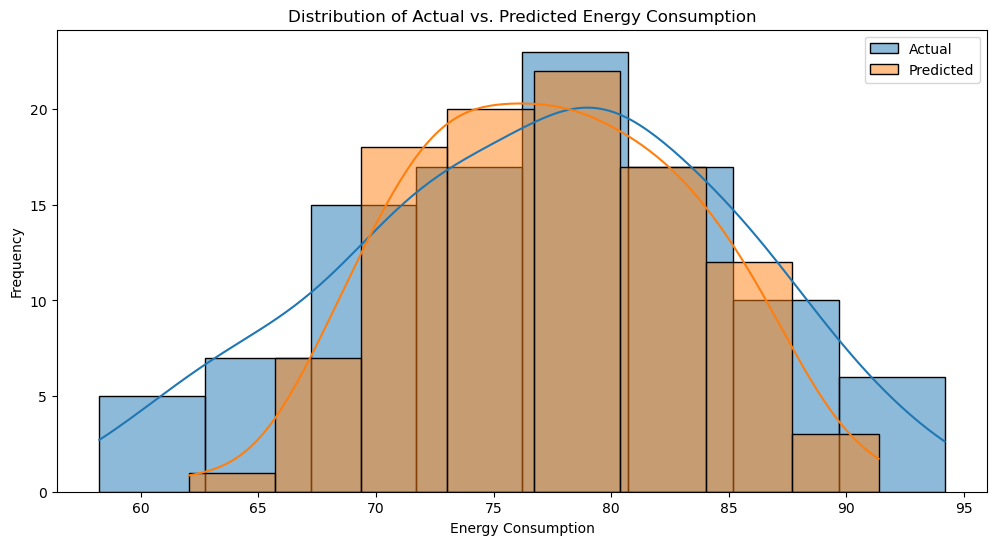

In [145]:
plt.figure(figsize=(12, 6))
sns.histplot(y_test, label='Actual', kde=True)
sns.histplot(y_pred, label='Predicted', kde=True)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

#### Random Forest:

In [146]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=SEED)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)

print("Random Forest:")
print(f"Root Mean Squared Error: {rmse}")

Random Forest:
Root Mean Squared Error: 5.219207830906246


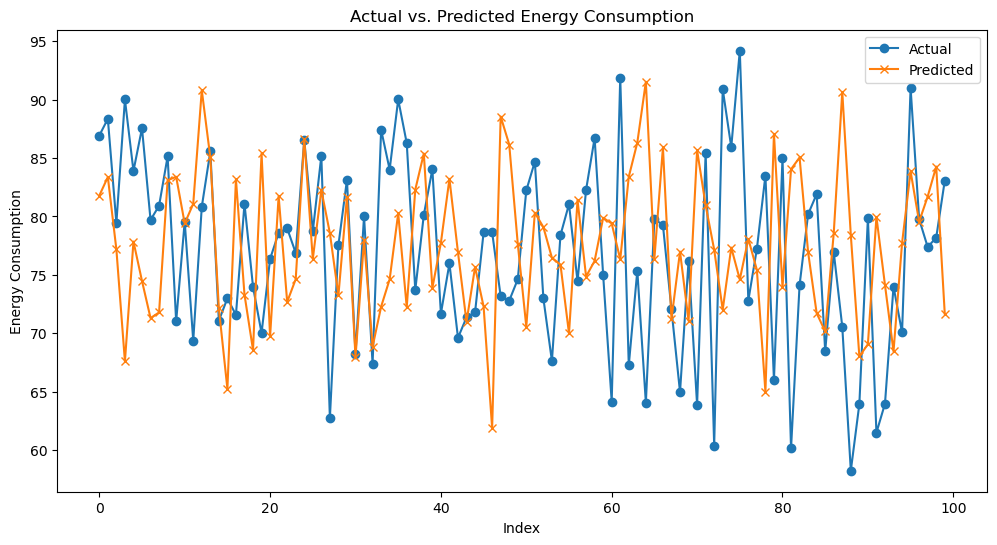

In [147]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

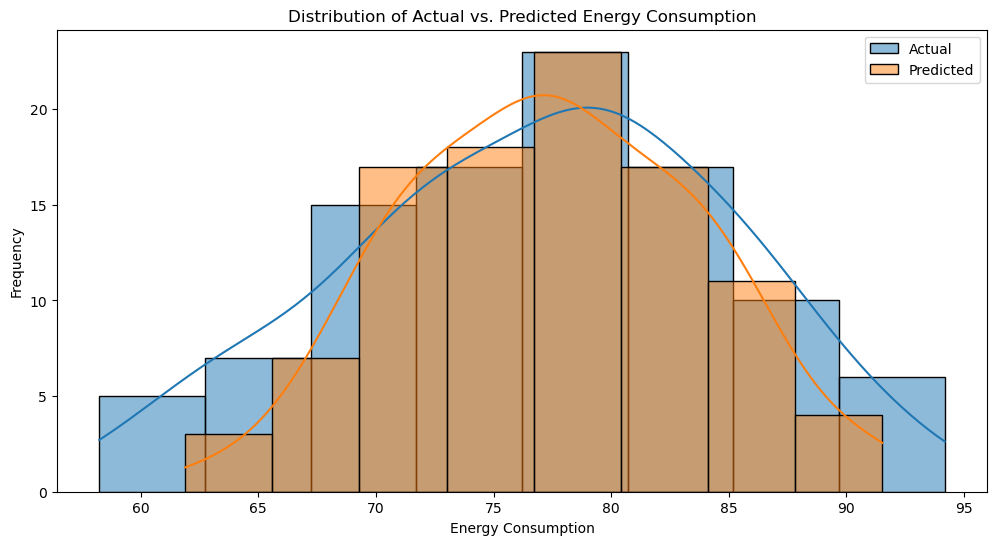

In [148]:
plt.figure(figsize=(12, 6))
sns.histplot(y_test, label='Actual', kde=True)
sns.histplot(y_pred, label='Predicted', kde=True)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

#### SVR:

In [149]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_val_scaled)
rmse = root_mean_squared_error(y_val, y_pred)

print("SVR:")
print(f"Root Mean Squared Error: {rmse}")

SVR:
Root Mean Squared Error: 5.353402168545995


#### Gradient Boosting Regressor:

In [150]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=SEED)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)

print("Gradient Boosting Regressor:")
print(f"Root Mean Squared Error: {rmse}")

Gradient Boosting Regressor:
Root Mean Squared Error: 5.397862866176669


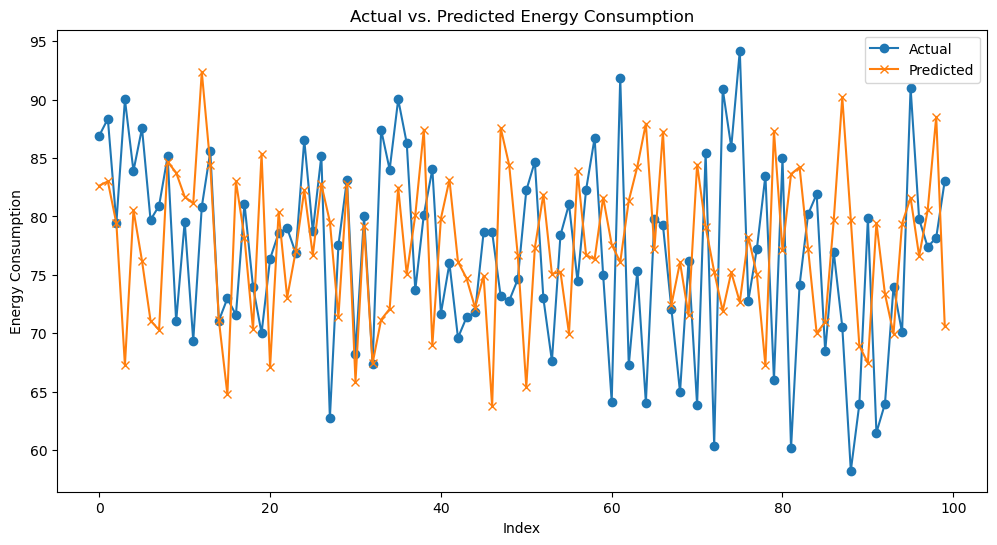

In [151]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

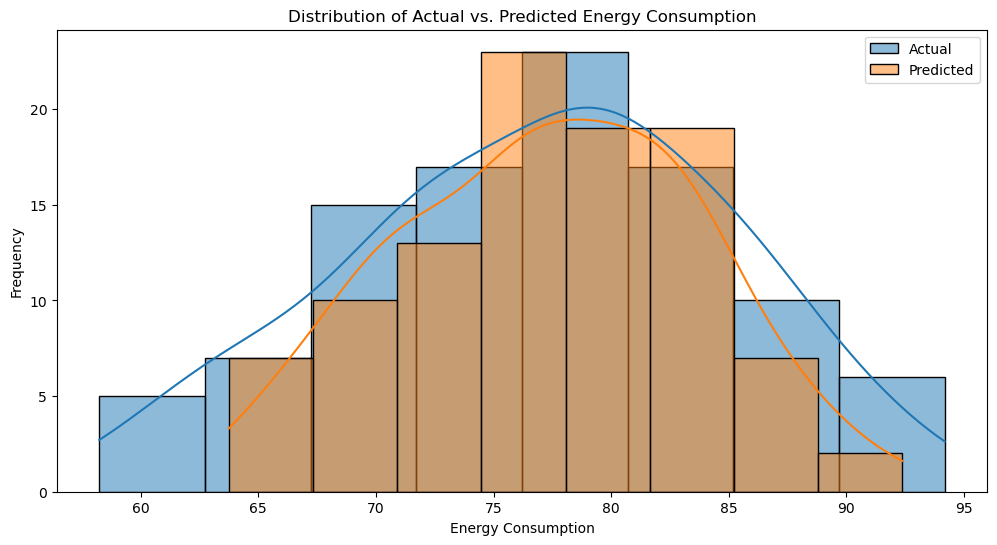

In [152]:
plt.figure(figsize=(12, 6))
sns.histplot(y_test, label='Actual', kde=True)
sns.histplot(y_pred, label='Predicted', kde=True)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

#### Model tuning for Random Forest Regressor: 

In [153]:
scores = []
 
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=SEED)
    rf.fit(X_train, y_train)
 
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    
    scores.append((n, rmse))
 
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,5.446892
1,20,5.344646
2,30,5.305910
3,40,5.213372
4,50,5.215408
5,60,5.247523
6,70,5.259081
7,80,5.221715
8,90,5.223835
9,100,5.219208


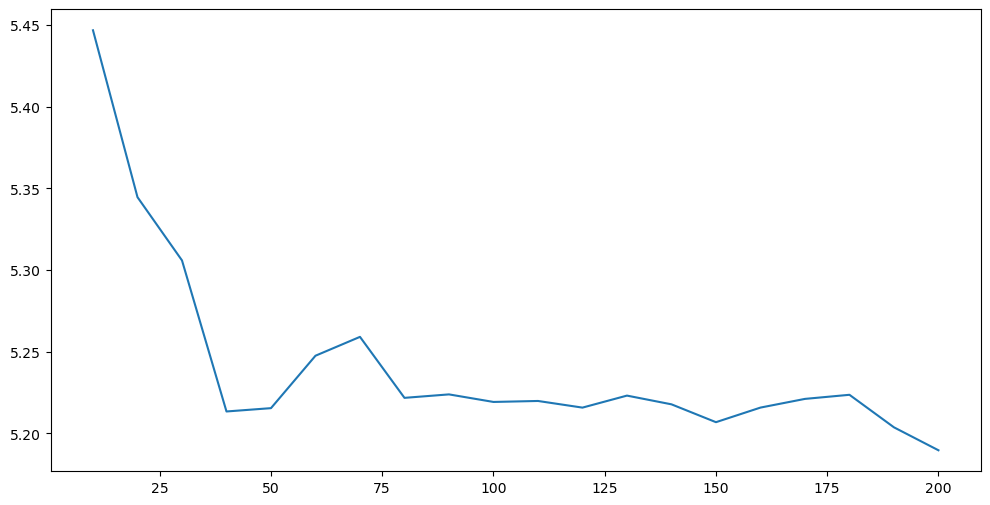

In [154]:
plt.figure(figsize=(12, 6))
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.show()

In [157]:
rmse_scores = []
best_score = 100
best_d = 0
best_n = 0

for d in range(1, 101, 10): 
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=SEED)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        rmse_scores.append((d, n, rmse))
        if rmse < best_score:
            best_score = rmse
            best_d = d
            best_n = n

print('Best RMSE:', best_score)
print('Best max_depth:', best_d)
print('Best n_estimators:', best_n)

Best RMSE: 5.168317853607234
Best max_depth: 11
Best n_estimators: 200


In [158]:
random_forest = RandomForestRegressor(n_estimators=200, max_depth=11, random_state=SEED)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)

print("Random Forest:")
print(f"Root Mean Squared Error: {rmse}")

Random Forest:
Root Mean Squared Error: 5.168317853607234


#### Testing on test dataset:

In [159]:
random_forest = RandomForestRegressor(n_estimators=200, max_depth=11, random_state=SEED)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

print("Random Forest:")
print(f"Root Mean Squared Error: {rmse}")

Random Forest:
Root Mean Squared Error: 5.224696013015375


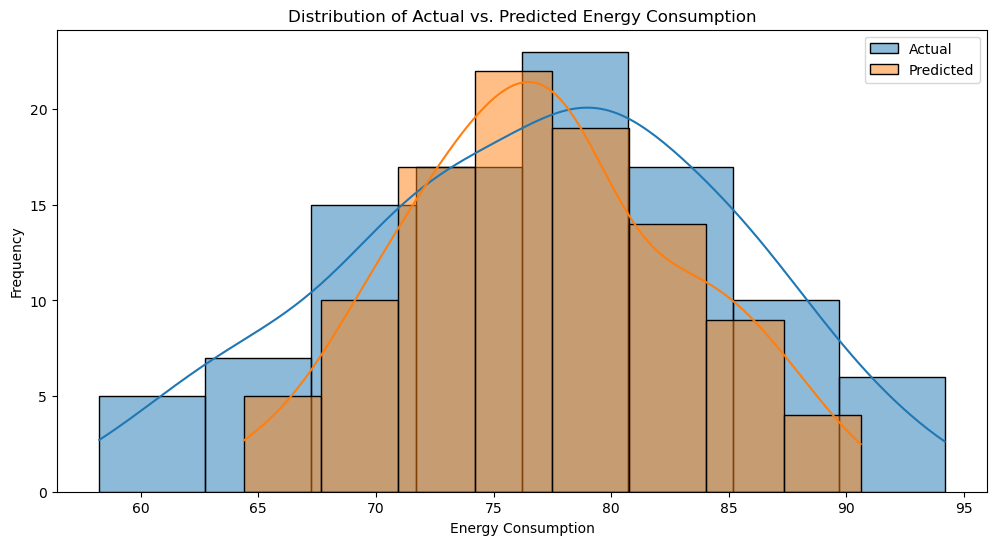

In [160]:
plt.figure(figsize=(12, 6))
sns.histplot(y_test, label='Actual', kde=True)
sns.histplot(y_pred, label='Predicted', kde=True)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()